# EDA

In [1]:
import nltk
import pandas as pd

In [2]:
df=pd.read_csv('/Users/zenghaoji/Documents/data:case/ZTGG/Project 2/archive/Reviews.csv')

In [3]:
df.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
df.shape

(568454, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [28]:
df.columns

Index(['Score', 'Sentiment', 'Summary', 'Text'], dtype='object')

In [29]:
df.rename(columns={'HelpfulnessNumerator':'helpful_vote','HelpfulnessDenominator':'total_vote'},inplace=True)

In [30]:
df['Sentiment']=df['Score'].apply(lambda x:'positive'if x>3 else 'negative')
#df.drop(['sentiment','Sssentiment'],axis=1)

In [31]:
df.head(5)

,Score,Sentiment,Summary,Text
0,5,positive,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,1,negative,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,4,positive,"""Delight"" says it all",This is a confection that has been around a fe...
3,2,negative,Cough Medicine,If you are looking for the secret ingredient i...
4,5,positive,Great taffy,Great taffy at a great price. There was a wid...


In [32]:
print(df['Sentiment'].value_counts())

positive    443777
negative    124677
Name: Sentiment, dtype: int64


In [33]:
df=df[['Score','Sentiment','Summary','Text']] #two [[]]
df.head()

,Score,Sentiment,Summary,Text
0,5,positive,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,1,negative,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,4,positive,"""Delight"" says it all",This is a confection that has been around a fe...
3,2,negative,Cough Medicine,If you are looking for the secret ingredient i...
4,5,positive,Great taffy,Great taffy at a great price. There was a wid...


In [34]:
df[df['Score']==5].head()

,Score,Sentiment,Summary,Text
0,5,positive,Good Quality Dog Food,I have bought several of the Vitality canned d...
4,5,positive,Great taffy,Great taffy at a great price. There was a wid...
6,5,positive,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,5,positive,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
8,5,positive,Yay Barley,Right now I'm mostly just sprouting this so my...


In [35]:
df[df['Score']==1].head()

,Score,Sentiment,Summary,Text
1,1,negative,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
12,1,negative,My Cats Are Not Fans of the New Food,My cats have been happily eating Felidae Plati...
26,1,negative,Nasty No flavor,"The candy is just red , No flavor . Just plan..."
50,1,negative,Don't like it,"This oatmeal is not good. Its mushy, soft, I d..."
62,1,negative,stale product.,Arrived in 6 days and were so stale i could no...


# 1.Data Cleaning Using NLTK.stopwords

In [36]:
import nltk
from nltk.corpus import stopwords
stop=stopwords.words('english')
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [37]:
'not'in stop

True

# 2.Data Cleaning Using SnowballStemmer

In [38]:
from nltk import SnowballStemmer
snow=SnowballStemmer('english')
print(snow.stem('tasty'))
print(snow.stem('excited'))

tasti
excit


1.puntuations removal

#The 'r' in front tells Python the expression is a raw string. In a raw string, escape sequences are not parsed. For example, '\n' is a single newline character. But, r'\n' would be two characters: a backslash and an 'n'.



In [39]:
import re
sentence="I'd like to have some coffee today!"
sentence=re.sub(r'[?|!|.|,|)|(|\|/]',r' ', sentence)
sentence

"I'd like to have some coffee today "

2.combine

In [40]:
def cleanup(st):
    st=str(st)
    st=st.lower()
    st=re.sub('[?|!|.|,|)|(|\|/]',r'',st)
    tokens=st.split()  #If is not provided then any white space is a separator.
    out=[]
    for t in tokens:
        out.append(snow.stem(t))
    out=' '.join(out)
    out=re.sub('[\'|"|#]',r'',out)
    return out  

In [41]:
print(cleanup('.....!how are you today?""'))

how are you today


In [42]:
df['Summary_Clean']=df['Summary'].apply(cleanup)


visiualization using wordcloud

In [43]:
#!pip install wordcloud
import matplotlib as mpl
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS

In [44]:
mpl.rcParams['font.size']=12
mpl.rcParams['savefig.dpi']=100
mpl.rcParams['figure.subplot.bottom']=.1

def show_wordcloud(data,title=None):
    wordcloud=WordCloud(
        background_color='white',
        stopwords=None,
        max_words=500,
        max_font_size=40,
        scale=4, #
        random_state=1).generate(str(data))
    fig=plt.figure(1,figsize=(8,8))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud)
    plt.show()

In [45]:
df.Summary_Clean.loc[df.Score==5]

0                          good qualiti dog food
4                                    great taffi
6         great just as good as the expens brand
7                             wonder tasti taffi
8                                     yay barley
                           ...                  
568448                veri larg ground spice jar
568449                       will not do without
568451                  perfect for our maltipoo
568452            favorit train and reward treat
568453                               great honey
Name: Summary_Clean, Length: 363122, dtype: object

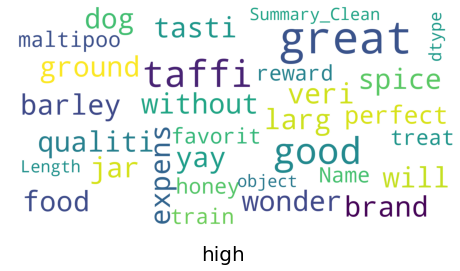

In [46]:
show_wordcloud(df.Summary_Clean.loc[df.Score==5],title='high')

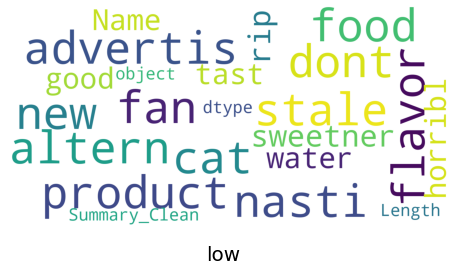

In [47]:
show_wordcloud(df.Summary_Clean.loc[df.Score==1],title='low')

In [48]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(df,test_size=0.2,random_state=1)
print('%d items in training,%d in test data'% (len(train),len(test)))
print(len(train)/(len(train)+len(test)))

454763 items in training,113691 in test data
0.7999996481685413


In [49]:
train.head()

,Score,Sentiment,Summary,Text,Summary_Clean
308346,5,positive,The best espresso i've ever had,"I've tried many types, but out of all of them,...",the best espresso iv ever had
74066,3,negative,"False advertising, but tasty",The only thing chipotle about this sauce is in...,fals advertis but tasti
125392,1,negative,Deadly treat,I bought these at a local store. I broke up th...,dead treat
173887,3,negative,Too Strong,I ordered light roast coffee and was sent one ...,too strong
484231,4,positive,Very Good Tea,This tea is very good. A cup in the morning an...,veri good tea


In [50]:
train=train.reset_index(drop=True)
train.head()


,Score,Sentiment,Summary,Text,Summary_Clean
0,5,positive,The best espresso i've ever had,"I've tried many types, but out of all of them,...",the best espresso iv ever had
1,3,negative,"False advertising, but tasty",The only thing chipotle about this sauce is in...,fals advertis but tasti
2,1,negative,Deadly treat,I bought these at a local store. I broke up th...,dead treat
3,3,negative,Too Strong,I ordered light roast coffee and was sent one ...,too strong
4,4,positive,Very Good Tea,This tea is very good. A cup in the morning an...,veri good tea


In [51]:
test=test.reset_index(drop=True)
test.head()

,Score,Sentiment,Summary,Text,Summary_Clean
0,5,positive,Cherry Pie Larabar,I love the Cherry Pie Lara bar. Best and tast...,cherri pie larabar
1,5,positive,Melitta Coffee,Melitta Cafe COllection Blanc et Noir coffee h...,melitta coffe
2,5,positive,great treat,my girls absolutely loved this tuna. they were...,great treat
3,5,positive,Daily Calming,The vendor is fast and dependable. The tea is ...,daili calm
4,5,positive,Best Canned Artichokes Out There!,UPDATE - 8/9/2010<br />A lot can happen in jus...,best can artichok out there


The raw news titles were transformed into a cleaned format containing only the essential information (last column of the above picture). The next step is to further transform the cleaned text into a form that the machine learning model can understand. This process is known as Vectorizing. 

three widely used vectorization techniques- Count vectorization, N-Grams, TF-IDF

# Vectorize

1) Uni-gram BOW

In [77]:
from sklearn.feature_extraction.text import CountVectorizer

In [78]:
trainv=train['Summary_Clean'].values
testv=test['Summary_Clean'].values

In [79]:
uni_gram=CountVectorizer(min_df=5,binary=True)
uni_gram_vectors_train=uni_gram.fit_transform(trainv)
uni_gram_vectors_test=uni_gram.fit_transform(testv)

In [80]:
uni_gram_vectors_train.shape

(454763, 8389)

In [81]:
type(uni_gram_vectors_train)

scipy.sparse.csr.csr_matrix

In [82]:
uni_gram_vectors_train[0]

<1x8389 sparse matrix of type '<class 'numpy.int64'>'
	with 6 stored elements in Compressed Sparse Row format>

2).Bi-gram Bow

if n=2, i.e bigram, then the columns would be — [“I love”, “love this”, ‘this article”]

For the python code, the cleaning process is performed similarly to the count vectorization technique, but the words are not in a tokenized list form. The tokenized words are joined to form a string, so the adjacent words can be gathered to effectively perform N-Grams.

In [98]:
bi_gram=CountVectorizer(ngram_range=(1,2),min_df=5,binary=True)
# # 1 means the minimum is unigram, 2 means max is bigrams?
bi_gram_vectors_train=uni_gram.fit_transform(trainv)
bi_gram_vectors_test=uni_gram.fit_transform(testv)

In [99]:
bi_gram_vectors_train.shape

(454763, 8389)

3).TF-IDF Term Frequency-Inverse Document Frequency (TF-IDF)

The second term of the equation helps in pulling out the rare words. What does that mean? If a word appeared multiple times across many documents, then the denominator df will increase, reducing the value of the second term. Term frequency or tf is the percentage of the number of times a word (x) occurs in the document (y) divided by the total number of words in y.


In [85]:
from sklearn.feature_extraction.text import TfidfVectorizer as T
tfidf=T(ngram_range=(1,2),min_df=5)
tv_train=tfidf.fit_transform(train['Summary_Clean'].values)
tv_test=tfidf.fit_transform(test['Summary_Clean'].values)


In [86]:
features=tfidf.get_feature_names()
features[0:10]

/Users/zenghaoji/opt/anaconda3/envs/CAMM/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['0z',
 '10',
 '10 calori',
 '10 month',
 '10 oz',
 '10 pack',
 '10 star',
 '10 year',
 '100',
 '100 calori']

In [87]:
prediction=dict()
pro=dict

# 3. Model Building-logistic regression

In [88]:
from sklearn.linear_model import LogisticRegression
import pickle

In [97]:
logreg_bi_gram=LogisticRegression(C=1e5,class_weight='balanced') #parameters?
logreg_bi_gram_result=lg_bigram.fit(bi_gram_vectors_train,train['Sentiment'])

logreg_bi_gram = pickle.load(open('/Users/zenghaoji/Documents/data:case/ZTGG/Project 2/archive/Reviews.csv', 'rb')) #?

/Users/zenghaoji/opt/anaconda3/envs/CAMM/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ValueError: could not convert string to int

# 4. Model Evaluation

In [94]:
from sklearn import metrics
from sklearn.metrics import roc_curve,auc

In [95]:
cmp=0
colors=['b','g','y','m','k']
for model, predicted in prediction.items():
    fp_rate,tp_rate,thresholds= \
    roc_curve(test['Sentiment'].values,prob['logistic_bi_gram'][:,1],pos_lable='postive')
    roc_auc=auc(fp_rate,tp_rate)
    plt.plot(fp_rate,tp_rate,colors[cmp],label='%s:AUC %0.2f'%(model,roc_auc))
    cmp+=1

plt.show()    
    
    
    

When a search engine returns 30 pages, only 20 of which are relevant, while failing to return 40 additional relevant pages, its precision is 20/30 = 2/3, which tells us how valid the results are, while its recall is 20/60 = 1/3, which tells us how complete the results are.

In [96]:
print(metrics.classification_report(test['Sentiment'].values, 
                                    prediction['logistic_bi_gram'], 
                                    target_names = ["negative", "positive"]))

KeyError: 'logistic_bi_gram'

In [ ]:
feature = bi_gram.get_feature_names()
feature_coefs = pd.DataFrame(
    data = list(zip(feature, logreg_bi_gram.coef_[0])),
    columns = ['feature', 'coef'])

feature_coefs.sort_values(by='coef')

# 5.Model Building-Random Forest

# 6.Model Evaluation

# 7. Restore Model